In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [9]:
df_M = pd.read_csv('data/Member_data.csv')
df_S = pd.read_csv('data/Sales_data.csv')
df_P = pd.read_csv('data/Product_data.csv')

c:\Users\LG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\LG\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
df_first = pd.merge(df_M, df_S, on = ['고객번호'], how = 'left')
df_first

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),구매금액,결제금액,물품대분류,상품명
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,25800.0,16314.0,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,51200.0,37769.0,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,5610.0,3800.0,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,59520.0,47922.0,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,50640.0,39788.0,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188570,20200724113017315991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,11700.0,9240.0,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA)
188571,20200729134409126553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,3000.0,3000.0,체험팩,맘큐 허그박스
188572,20200803075905757887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,5900.0,5841.0,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA)
188573,20200805170229147688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,3000.0,3000.0,체험팩,맘큐 허그박스


In [11]:
df = pd.DataFrame(df_first[['고객번호', '구매일','물품대분류']]) ;df.reset_index(drop = True)
recency = df.drop_duplicates(['고객번호'], keep = 'first')
recency

,고객번호,구매일,물품대분류
0,201812310749735,2019-05-06,더블하트
2,201812310749770,2019-02-28,FMC
3,201812310749771,2019-05-13,기저귀
4,201812310749774,2019-05-10,기저귀
6,201812310749780,2019-01-30,체험팩
...,...,...,...
188570,20200724113017315991,2020-07-24,FMC
188571,20200729134409126553,2020-07-29,체험팩
188572,20200803075905757887,2020-08-03,체험팩
188573,20200805170229147688,2020-08-06,체험팩


<AxesSubplot:xlabel='물품대분류', ylabel='count'>

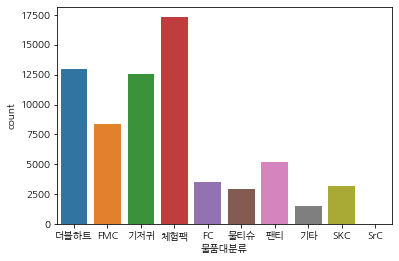

In [12]:
sns.countplot(x='물품대분류', data = recency)

In [13]:
df = pd.DataFrame(df_first[['고객번호', '구매일','상품명']]) ;df.reset_index(drop = True)
recency = df.drop_duplicates(['고객번호'], keep = 'first')
recency

,고객번호,구매일,상품명
0,201812310749735,2019-05-06,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
2,201812310749770,2019-02-28,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201812310749771,2019-05-13,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201812310749774,2019-05-10,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)
6,201812310749780,2019-01-30,[하기스 샘플러_3단계 여아] + 매직핏팬티 체험팩
...,...,...,...
188570,20200724113017315991,2020-07-24,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA)
188571,20200729134409126553,2020-07-29,맘큐 허그박스
188572,20200803075905757887,2020-08-03,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA)
188573,20200805170229147688,2020-08-06,맘큐 허그박스


In [14]:
df2 = recency.groupby('상품명')['구매일'].count()
# df2[df2 > 100]
df2

상품명
(1+1) 좋은느낌 입는 오버나이트 대형 8개입                                 2
(1+1) 좋은느낌 입는 오버나이트 중형 8개입                                 2
(1+1) 크리넥스 버블버블 핸드워시 그린향 거품펌프형 250ml + 용기형리필 250ml X 2     5
(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA)                           1
(더블하트 모유보관팩 180ml x 25매 증정) 베스트 수유용품 세트                    4
                                                          ..
화이트 탐폰 레귤러 16개입                                           21
화이트 탐폰 슈퍼 16개입                                            32
화이트 탐폰 오가닉 레귤러 14개입                                        2
화이트 탐폰 오가닉 슈퍼 14개입                                         4
화이트 한듯안한듯 팬티라이너 롱 36개입                                     5
Name: 구매일, Length: 1909, dtype: int64

<AxesSubplot:xlabel='상품명'>

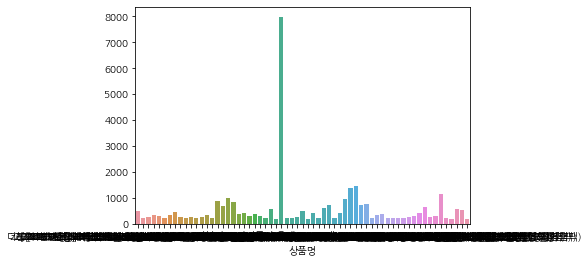

In [27]:
sns.barplot(x=df2[df2>200].index, y= df2[df2>200].values)

In [37]:
df_recency = df2[df2>200].sort_values()
df_recency

상품명
하기스 보송보송 3단계 공용 186매(밴드형)            203
크리넥스 디럭스 신수성 리미티드 250매X3개입           207
하기스 맥스드라이 팬티 3단계 여아 20매(팬티형/체험팩)     209
릴리유 퓨어골드 무민에디션 아기물티슈 캡형 80매X8팩       210
크리넥스 베이비 입체 마스크 (3개입)                211
                                    ... 
더블하트 SofTouch 모유실감 젖꼭지 M (2입)       1015
하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩)       1160
하기스 네이처메이드 2단계 남아 156매(밴드형)         1375
하기스 네이처메이드 2단계 여아 156매(밴드형)         1453
맘큐 허그박스                             7984
Name: 구매일, Length: 63, dtype: int64

In [40]:
pd.DataFrame(df_recency).index

Index(['하기스 보송보송 3단계 공용 186매(밴드형)', '크리넥스 디럭스 신수성 리미티드 250매X3개입',
       '하기스 맥스드라이 팬티 3단계 여아 20매(팬티형/체험팩)', '릴리유 퓨어골드 무민에디션 아기물티슈 캡형 80매X8팩',
       '크리넥스 베이비 입체 마스크 (3개입)', '하기스 네이처메이드 이른둥이기저귀 중형 150매(밴드형)',
       '하기스 네이처메이드 팬티 3단계 남아 20매(팬티형/체험팩)', '그린핑거 시그니처 물티슈 캡형 64매 x 6팩',
       '하기스 맥스드라이 팬티 3단계 남아 20매(팬티형/체험팩)', '좋은느낌 순수 팬티라이너 롱 18개입',
       '더블하트 SofTouch 모유실감 노꼭지트윈팩 240ml(오렌지) + SofTouch 모유실감 젖꼭지 M(2입)',
       '크리넥스 안심 클래식 키친타올 140매 X 12롤', '좋은느낌 팬티라이너 유기농 순면 롱 36개입',
       '더블하트 허니콤 수유패드 144매', '하기스 네이처메이드 밤부 3단계 남아 144매(밴드형)',
       '2020 하기스 매직팬티 컴포트 3단계 남아 20매(팬티형/체험팩)',
       '[1+1] 하기스 수딩케어 물티슈 캡형 64매X10팩', '그린핑거 힘센보습 울트라 워시 300ml',
       '하기스 네이처메이드 밤부 1단계 공용 186매(밴드형)', '하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)',
       '[2019년형] 하기스 에어솔솔 썸머팬티 4단계 남아용 20매(팬티형/체험팩)',
       '크리넥스 NEW 디럭스 미니_카카오 230매 X 6개입',
       '2020 하기스 매직팬티 컴포트 3단계 여아 20매(팬티형/체험팩)', '그린핑거 힘센보습 울트라 로션 260ml',
       '하기스 네이처메이드 팬티 3단계 여아 20매(팬티형/체험팩)',
       '더블하트 SofTouch 모유실감 노꼭지 트윈팩 160ml(오렌지)'